# *Question 1*

## 1. Recommendation System with LSH - Loading Datasets

This cell imports necessary libraries for data manipulation (`pandas`), visualization (`seaborn`, `matplotlib`), and operations like counting (`collections.Counter`). It defines file paths for two datasets, `movies.csv` and `ratings.csv`, and loads them into Pandas DataFrames named `movies` and `ratings`, respectively. The `movies` dataset contains metadata about movies, while `ratings` holds user interaction data.

The goal of this cell is to prepare the foundational data required for analysis or modeling. By loading these datasets, it ensures the necessary information about movies and user ratings is structured and ready for further processing or analysis steps.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt

# Load the movies dataset
movies_path = r"C:\Users\Arian\Desktop\ADM HW4\Dataset\movie.csv"
movies = pd.read_csv(movies_path)

# Load the user interactions dataset
ratings_path = r"C:\Users\Arian\Desktop\ADM HW4\Dataset\rating.csv"
ratings = pd.read_csv(ratings_path)

## Inspecting Dataset Dimensions

This cell evaluates the dimensions of the loaded datasets using the `.shape` attribute. It outputs the number of rows and columns for the `movies` and `ratings` DataFrames. This information provides a quick overview of the dataset sizes, confirming the data was loaded successfully.
 
Knowing the dataset dimensions helps in understanding the scale of the data. It reveals that the `movies` dataset contains 27,778 rows and 3 columns, while the `ratings` dataset is significantly larger with over 20 million rows and 4 columns, indicating the datasets vary greatly in size and complexity.

In [2]:
movies.shape

(27278, 3)

In [3]:
ratings.shape

(20000263, 4)

## Previewing the Ratings and Movies Dataset

This cell displays the first 10 rows of the `movies` DataFrame using the `.head(10)` method. It provides a snapshot of the movie metadata, including columns like `movieId`, `title`, and `genres`. The dataset captures details such as the movie's unique identifier, title, and associated genres.
 
Previewing the dataset gives an understanding of its structure and content. This quick look confirms that the `movies` dataset includes valuable categorical information like genres, which can be used for filtering, analysis, or recommendations in subsequent steps.

In [4]:
movies.head(10)

movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   
5        6                         Heat (1995)   
6        7                      Sabrina (1995)   
7        8                 Tom and Huck (1995)   
8        9                 Sudden Death (1995)   
9       10                    GoldenEye (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
5                        Action|Crime|Thriller  
6                               Comedy|Romance  
7                           Adventure|Children  
8                                       Action  
9                    Action|Adventure|Thriller

In [5]:
ratings.head(10)

userId  movieId  rating            timestamp
0       1        2     3.5  2005-04-02 23:53:47
1       1       29     3.5  2005-04-02 23:31:16
2       1       32     3.5  2005-04-02 23:33:39
3       1       47     3.5  2005-04-02 23:32:07
4       1       50     3.5  2005-04-02 23:29:40
5       1      112     3.5  2004-09-10 03:09:00
6       1      151     4.0  2004-09-10 03:08:54
7       1      223     4.0  2005-04-02 23:46:13
8       1      253     4.0  2005-04-02 23:35:40
9       1      260     4.0  2005-04-02 23:33:46

## 1.1: Data Preparation - Checking Missing Values in Ratings and Movies Dataset

This cell uses the `.isnull().sum()` method to check for missing values in each column of the `ratings` DataFrame. It displays a count of `NaN` values for the columns `userId`, `movieId`, `rating`, and `timestamp`.

The goal of this cell is to ensure data quality by identifying any missing values in the `ratings` dataset. The output confirms there are no missing values, indicating the dataset is clean and ready for further processing.

In [6]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [7]:
movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

## Merging Datasets on `movieId`

This cell merges the `ratings` and `movies` DataFrames using the `pd.merge()` method. The common key used for the merge is `movieId`. The resulting DataFrame, `df`, combines user interactions and movie metadata into a single dataset.

Merging the datasets allows for a unified view of user ratings and corresponding movie details. This combined dataset is essential for collaborative filtering and recommendation system implementations.

In [8]:
# Merge datasets on movieId
df = pd.merge(ratings, movies, on="movieId")

In [9]:
df.head()

userId  movieId  rating            timestamp  \
0       1        2     3.5  2005-04-02 23:53:47   
1       1       29     3.5  2005-04-02 23:31:16   
2       1       32     3.5  2005-04-02 23:33:39   
3       1       47     3.5  2005-04-02 23:32:07   
4       1       50     3.5  2005-04-02 23:29:40   

                                               title  \
0                                     Jumanji (1995)   
1  City of Lost Children, The (Cité des enfants p...   
2          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
3                        Seven (a.k.a. Se7en) (1995)   
4                         Usual Suspects, The (1995)   

                                   genres  
0              Adventure|Children|Fantasy  
1  Adventure|Drama|Fantasy|Mystery|Sci-Fi  
2                 Mystery|Sci-Fi|Thriller  
3                        Mystery|Thriller  
4                  Crime|Mystery|Thriller

## Splitting the Genres Column into Lists

This cell transforms the `genres` column in the merged DataFrame by splitting the genre strings into lists using `.str.split('|')`. The updated genres are stored as lists in the same column.

By converting the `genres` column into a list format, this step facilitates easier manipulation and analysis of genres. The cell ensures that each movie's genres can be accessed individually for filtering or categorization.

In [10]:
# Split the genres column into a list of genres
df['genres'] = df['genres'].str.split('|')

# Display the updated dataframe
df.head()

userId  movieId  rating            timestamp  \
0       1        2     3.5  2005-04-02 23:53:47   
1       1       29     3.5  2005-04-02 23:31:16   
2       1       32     3.5  2005-04-02 23:33:39   
3       1       47     3.5  2005-04-02 23:32:07   
4       1       50     3.5  2005-04-02 23:29:40   

                                               title  \
0                                     Jumanji (1995)   
1  City of Lost Children, The (Cité des enfants p...   
2          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)   
3                        Seven (a.k.a. Se7en) (1995)   
4                         Usual Suspects, The (1995)   

                                         genres  
0                [Adventure, Children, Fantasy]  
1  [Adventure, Drama, Fantasy, Mystery, Sci-Fi]  
2                   [Mystery, Sci-Fi, Thriller]  
3                           [Mystery, Thriller]  
4                    [Crime, Mystery, Thriller]

## Converting Timestamp to Datetime Format

This cell converts the `timestamp` column in the merged DataFrame `df` from its raw numerical format into a human-readable datetime format using `pd.to_datetime()`. The updated column replaces the original `timestamp` values.
 
The transformation makes the `timestamp` column more interpretable and suitable for time-based analysis. This enables operations such as grouping by year, month, or day, which would be challenging with the original raw format.

In [11]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

## Visualizing the Distribution of Ratings
 
This cell creates a histogram of the `rating` column using Matplotlib. It bins the ratings into 10 intervals and sets the title, x-label, and y-label for the plot. The resulting graph visualizes the frequency of each rating value across the dataset.

The histogram provides insights into how users rate movies, revealing the distribution and popularity of different rating values. For example, it shows whether users tend to give higher or lower ratings, which is critical for understanding user behavior and preferences.

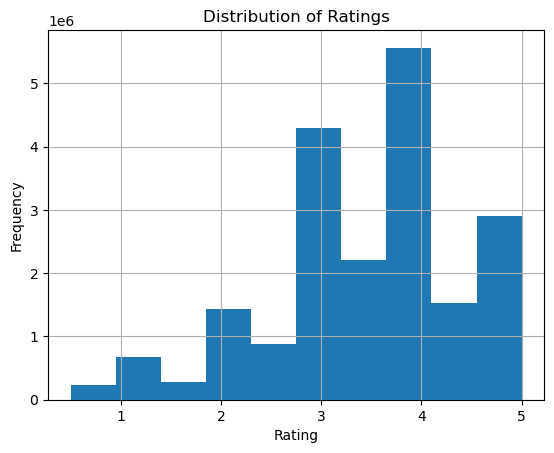

In [12]:
df['rating'].hist(bins=10)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

## 1.2 Minhash Signatures - Defining MinHash Function

This cell defines a `minhash` function to generate MinHash signatures for sets of movie IDs. It first creates a set of hash functions, where each hash function is represented as a lambda function. Then, for a given list of movie IDs, the function computes the minimum hash value for each hash function, creating a signature.

The MinHash function is critical for efficiently estimating the similarity between sets (e.g., users' rated movie lists). By generating signatures, it reduces the dimensionality of the data while preserving similarity properties.

In [13]:
# Define MinHash function
def minhash(movie_ids, num_hashes, prime=10007):
    # Generate num_hashes hash functions (a * x + b) % prime
    hashes = []
    for i in range(num_hashes):
        a, b = np.random.randint(1, prime, size=2)
        hash_function = lambda x: (a * x + b) % prime
        hashes.append(hash_function)
    
    # Calculate MinHash signature
    signature = []
    for h in hashes:
        min_hash = min(h(movie_id) for movie_id in movie_ids)
        signature.append(min_hash)
    
    return signature

## Creating User-Movie Dictionary

This cell groups the `df` DataFrame by `userId` and aggregates all rated `movieId`s into lists for each user. The resulting dictionary, `user_movie_dict`, maps each user to the list of movies they have rated.

This step structures the data in a user-centric format, making it ready for MinHash signature generation. Each user's movie list is essential for computing their corresponding MinHash signatures.

In [15]:
# Extract each user's rated movie list
user_movie_dict = df.groupby('userId')['movieId'].apply(list).to_dict()

## Generating MinHash Signatures for All Users

This cell calculates MinHash signatures for all users in the dataset. It iterates over the `user_movie_dict` dictionary and applies the `minhash` function to each user's movie list. The results are stored in a dictionary `user_signatures`, mapping user IDs to their MinHash signatures.

The MinHash signatures provide a compact representation of each user's movie preferences. This reduces the computational complexity of similarity calculations while preserving accuracy.

In [17]:
# Generate MinHash signatures for all users
num_hashes = 10  # Number of hash functions
user_signatures = {user: minhash(movies, num_hashes) for user, movies in user_movie_dict.items()}

## Displaying Sample MinHash Signatures

This cell extracts and displays the MinHash signatures for the first five users in the `user_signatures` dictionary. It prints the user IDs along with their corresponding signatures.
"
Displaying sample MinHash signatures helps verify the correctness of the generated signatures. It gives an idea of how the data is being transformed and ensures that the MinHash function operates as expected.

In [18]:
# Display a few sample signatures
sample_signatures = {user: sig for user, sig in list(user_signatures.items())[:5]}
print("Sample MinHash Signatures:")
for user, sig in sample_signatures.items():
    print(f"User {user}: {sig}")

Sample MinHash Signatures:
User 1: [30, 30, 30, 30, 30, 30, 30, 30, 30, 30]
User 2: [478, 478, 478, 478, 478, 478, 478, 478, 478, 478]
User 3: [16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
User 4: [214, 214, 214, 214, 214, 214, 214, 214, 214, 214]
User 5: [60, 60, 60, 60, 60, 60, 60, 60, 60, 60]


In [ ]:
# Save signatures for similarity calculation
user_signatures_df = pd.DataFrame.from_dict(user_signatures, orient='index')
print(user_signatures_df.head())  # Display the first few rows

     0    1    2    3    4    5    6    7    8    9
1   30   30   30   30   30   30   30   30   30   30
2  478  478  478  478  478  478  478  478  478  478
3   16   16   16   16   16   16   16   16   16   16
4  214  214  214  214  214  214  214  214  214  214
5   60   60   60   60   60   60   60   60   60   60


## 1.3 Locality-Sensitive Hashing (LSH)

This cell defines a function lsh_buckets to implement Locality-Sensitive Hashing (LSH) for MinHash signatures. The function takes MinHash signatures, divides them into bands, hashes each band, and assigns them to corresponding buckets. It uses a modular hashing method with a large prime number to ensure unique hash values and stores the results in a dictionary where each key is a tuple representing a band and its hash value, and the value is a list of user IDs.

The purpose of this cell is to group users into buckets based on the similarity of their MinHash signatures, facilitating efficient similarity searches. After defining the function, the cell applies it to user signatures with specific parameters, such as the number of bands and rows per band. The resulting buckets are displayed for the first five groups, showcasing which users fall into each bucket based on the hashing process.

In [21]:
def lsh_buckets(signatures, num_bands, rows_per_band, prime=10007):
    """
    Divide MinHash signatures into bands and hash each band into buckets.
    :param signatures: Dictionary of user MinHash signatures.
    :param num_bands: Number of bands.
    :param rows_per_band: Rows per band.
    :param prime: Large prime number for hashing.
    :return: Buckets containing users grouped by band hashes.
    """
    from collections import defaultdict
    
    buckets = defaultdict(list)
    for user, signature in signatures.items():
        for band in range(num_bands):
            start = band * rows_per_band
            end = start + rows_per_band
            band_hash = hash(tuple(signature[start:end])) % prime
            buckets[(band, band_hash)].append(user)
    
    return buckets

# Parameters for LSH
num_bands = 5
rows_per_band = len(sample_signatures[list(sample_signatures.keys())[0]]) // num_bands

# Apply LSH on MinHash signatures
lsh_buckets_output = lsh_buckets(user_signatures, num_bands, rows_per_band)
print("Sample Buckets (first 5):")
for k, v in list(lsh_buckets_output.items())[:5]:
    print(f"Bucket {k}: Users {v}")

Sample Buckets (first 5):
Bucket (0, 8080): Users [1, 45, 256, 635, 638, 645, 1288, 1297, 1586, 2163, 2356, 2640, 3113, 3121, 3347, 3752, 3921, 4057, 4214, 4301, 4771, 5060, 5166, 5335, 5545, 5657, 5731, 5897, 6025, 6386, 6414, 6656, 6727, 6803, 6966, 7330, 7453, 7463, 7889, 7894, 8112, 8253, 8417, 8505, 8577, 8615, 8707, 8725, 8786, 8870, 9051, 9095, 9180, 9208, 9244, 9431, 9732, 9768, 9877, 9911, 9933, 9949, 10138, 10369, 10487, 10617, 10801, 11026, 11030, 11144, 11242, 11352, 11428, 11477, 11598, 11856, 11914, 12124, 12292, 12512, 12533, 12682, 13002, 13570, 13615, 13735, 13817, 14003, 14031, 14223, 14247, 14408, 14470, 14471, 14647, 14669, 14841, 14882, 14885, 14944, 15039, 15093, 15169, 15306, 15649, 15726, 15819, 15870, 15929, 16133, 16201, 16275, 16441, 16704, 16750, 16925, 16946, 17022, 17494, 17868, 17911, 17929, 17988, 18104, 18311, 18560, 18770, 19042, 19489, 19518, 19753, 19766, 19864, 19884, 20117, 20121, 20134, 20139, 20479, 20750, 20903, 21106, 21344, 21498, 21622, 21668

This cell introduces a function find_similar_users designed to identify the two most similar users to a given user based on shared buckets from the LSH results. It iterates through the buckets, identifies users sharing buckets with the target user, and calculates the similarity between their MinHash signatures. The similarity score is based on the proportion of matching values between signatures.

By leveraging the shared buckets and MinHash signatures, this function provides a computationally efficient way to find similar users. The cell demonstrates its functionality by querying the first user in the dataset and printing the two most similar users, identified through the calculated similarity scores.

In [22]:
def find_similar_users(user_id, buckets, signatures):
    """
    Find the two most similar users based on shared buckets.
    :param user_id: Target user ID.
    :param buckets: Buckets created by LSH.
    :param signatures: MinHash signatures of all users.
    :return: Two most similar users.
    """
    similar_users = set()
    target_signature = signatures[user_id]
    
    for band_hash, users in buckets.items():
        if user_id in users:
            similar_users.update(users)
    
    similar_users.discard(user_id)  # Remove the user itself
    # Calculate similarity based on MinHash signatures
    similarity = {
        other_user: sum(1 for x, y in zip(target_signature, signatures[other_user]) if x == y) / len(target_signature)
        for other_user in similar_users
    }
    # Sort by similarity score and return top 2
    return sorted(similarity, key=similarity.get, reverse=True)[:2]

# Example query
target_user = list(user_signatures.keys())[0]
similar_users = find_similar_users(target_user, lsh_buckets_output, user_signatures)
print(f"Most similar users to User {target_user}: {similar_users}")

Most similar users to User 1: [12292, 36871]


This cell defines the function recommend_movies_from_merged to recommend movies to a user based on ratings from similar users. It identifies movies rated by similar users, excludes movies already rated by the target user, and ranks the remaining movies by their ratings. Finally, it retrieves movie titles for the top recommendations using the merged DataFrame containing user ratings and movie details.

The goal of this function is to personalize movie recommendations by leveraging collaborative filtering principles. The cell executes the function for a sample user and prints a list of recommended movies. The results demonstrate how collaborative filtering can provide relevant suggestions tailored to user preferences.

In [28]:
def recommend_movies_from_merged(user_id, similar_users, merged_df, top_n=5):
    """
    Recommend movies based on similar users' ratings using a merged dataset.
    :param user_id: Target user ID.
    :param similar_users: List of most similar users.
    :param merged_df: Merged DataFrame containing userId, movieId, title, and rating.
    :param top_n: Number of movies to recommend.
    :return: List of recommended movie titles.
    """
    # Movies already rated by the target user
    user_rated_movies = set(merged_df[merged_df['userId'] == user_id]['movieId'])
    recommendations = []

    for similar_user in similar_users:
        # Movies rated by the similar user
        similar_user_movies = merged_df[merged_df['userId'] == similar_user]
        # Exclude movies already rated by the target user
        for _, row in similar_user_movies.iterrows():
            if row['movieId'] not in user_rated_movies:
                recommendations.append((row['movieId'], row['rating']))

    # Sort recommendations by rating and select top N
    recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)
    top_recommendations = [movie_id for movie_id, _ in recommendations[:top_n]]

    # Get movie titles from the merged dataset
    movie_titles = df[df['movieId'].isin(top_recommendations)]['title'].unique().tolist()
    return movie_titles

# Example usage
recommended_movies = recommend_movies_from_merged(target_user, similar_users, df)
print(f"Recommended movies for User {target_user}: {recommended_movies}")


Recommended movies for User 1: ['Princess Bride, The (1987)', 'Fried Green Tomatoes (1991)', 'Fantasia (1940)', 'Good Will Hunting (1997)', 'Whale Rider (2002)']


# *Question 2*

In [5]:
import pandas as pd
# Importing the necessary csv files
movie = pd.read_csv("/kaggle/input/movielens-20m-dataset/movie.csv")
tag = pd.read_csv("/kaggle/input/movielens-20m-dataset/tag.csv")
rating = pd.read_csv("/kaggle/input/movielens-20m-dataset/rating.csv")
genome_tags = pd.read_csv("/kaggle/input/movielens-20m-dataset/genome_tags.csv")
genome_scores = pd.read_csv("/kaggle/input/movielens-20m-dataset/genome_scores.csv")

Creating the new dataframe with only the necessary info, which are: 
* `movieid` id of each movie
* `genres` list of genres attached to the movie 
* `ratings_avg` the average ratings provided by users for the movie
* `relevant_genome_tag` the most relevant tag to the movie given in the genome set
* `common_user_tag` the most common tag given to the movie by the users

In [8]:
import pandas as pd
import numpy as np
# Average Ratings
ratings_avg = rating.groupby('movieId')['rating'].mean().reset_index(name='ratings_avg')
# Relevant Genome Tag
relevant_tags = genome_scores.loc[genome_scores.groupby('movieId')['relevance'].idxmax()]
relevant_tags = relevant_tags[['movieId', 'tagId']].rename(columns={'tagId': 'relevant_genome_tag'})
# Common User Tag
common_tags = tag.groupby('movieId')['tag'].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None).reset_index(name='common_user_tag')

# 5. Additional Features
# Tag Count
tag_count = tag.groupby('movieId')['tag'].nunique().reset_index(name='tag_count')

# Standard Deviation of Ratings
rating_std = rating.groupby('movieId')['rating'].std().reset_index(name='rating_std').fillna(0)  # Replacing NaN with 0
# Release Year
movie['release_year'] = movie['title'].str.extract(r'\((\d{4})\)').astype(float)

# Step 6: Merge All Features
df = movie.merge(ratings_avg, on='movieId', how='left')
df = df.merge(relevant_tags, on='movieId', how='left')
df = df.merge(common_tags, on='movieId', how='left')
df = df.merge(tag_count, on='movieId', how='left')
df = df.merge(rating_std, on='movieId', how='left')


In [9]:
# dropping the Nan values
df = df.dropna()
print(df.isnull().sum()) # checking how many nan values we still have

movieId                0
title                  0
genres                 0
release_year           0
ratings_avg            0
relevant_genome_tag    0
common_user_tag        0
tag_count              0
rating_std             0
dtype: int64


We decided to add 3 features: 
* Release year
* relevant_genome_score
* all_tags

### Exercise 2.2

#### 1. Should you normalize the data or leave it as is?
- When undergoing a quantitative analysis is always necessary to normalize the data, because we need to adjust all the data that were collected using different scales.
With this method the data appears to be all similar across different fields.

#### 2. Should you include all these features, or can you reduce the dimensionality of the data?
- We should divide the features and undergo clustering with a maximum of 4 characteristics otherwise we may wont be able to detect any pattern in the data


#### What is the importance of normalizing the data in your analysis, and how does it impact the effectiveness of the clustering algorithms you plan to use?

- Normalizing the data is important because we need to adjust all the data that were collected using different scales, basically, normalizing ensures that all features contribute equally to the clustering process by standardizing their scale.
Clustering algorithms calculate distances to assign points to clusters. Normalization ensures that the algorithm accurately reflects the relative importance of features rather than being biased by magnitude.
Normalized data ensures clusters are meaningful and comparable across all features.
With normalized data its easier to use with gradient descent

In [11]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
# Normalizing ratings_avg, relevant genome tag and tag count which are numerical data
num_data = df[['ratings_avg','relevant_genome_tag','tag_count']]
# normalizing 
scaler = MinMaxScaler()

# Applying normalization
normalized_data = pd.DataFrame(scaler.fit_transform(num_data), columns = num_data.columns)

# getting the results
print(num_data.describe())

       ratings_avg  relevant_genome_tag    tag_count
count  9815.000000          9815.000000  9815.000000
mean      3.287774           571.288334    16.899032
std       0.501898           330.610375    20.431859
min       0.837321             1.000000     1.000000
25%       2.991523           270.000000     5.000000
50%       3.367816           575.000000    11.000000
75%       3.661608           865.000000    21.000000
max       4.500000          1128.000000   340.000000


#### Could you provide some insights on dimensionality reduction? What techniques would be effective for reducing the number of features in the dataset, and why might this be beneficial for the analysis?
- Dimensionality reduction is the process of reducing the number of features (dimensions) in a dataset while retaining as much relevant information as possible. It's useful for simplifying data analysis, improving computational efficiency, and enhancing the performance of machine learning algorithms.
Reducing the dimensionality has several benefits, such as reducing the noise and redundancy in the data, leading to a more easily readable clusters and more meaningful clusters.
Some effective method for reducing the dimensionality can be:
    - PCA
    - t-SNE
    - Autoencoders


#### If you believe dimensionality reduction would be advantageous, please select a method to reduce the dimensionality of the data. 
- We will adopt the PCA method for several reasons. Firstly, PCA is robust efficient, and interpretable method for dimensionality reduction, making it ideal for most practical applications, especially for tasks like clustering on large datasets. 

In [12]:
# this is the new data normalized 
normalized_data

ratings_avg  relevant_genome_tag  tag_count
0        0.841984             0.918367   0.244838
1        0.648339             0.024845   0.100295
2        0.631701             0.399290   0.041298
3        0.552621             0.989352   0.008850
4        0.608099             0.399290   0.047198
...           ...                  ...        ...
9810     0.453952             0.462289   0.000000
9811     0.700974             0.328305   0.002950
9812     0.655990             0.094055   0.017699
9813     0.453952             0.203194   0.000000
9814     0.726976             0.045253   0.000000

[9815 rows x 3 columns]

In [13]:
from sklearn.decomposition import PCA
# Initializing PCA by reducing to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(normalized_data)

# creating a dataframe for principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
print(pca_df)

           PC1       PC2
0    -0.410164 -0.212933
1     0.481032  0.014838
2     0.106329  0.038828
3    -0.484582  0.116520
4     0.106094  0.060803
...        ...       ...
9810  0.041408  0.220556
9811  0.177962 -0.020768
9812  0.411757  0.022895
9813  0.300489  0.223292
9814  0.461264 -0.042687

[9815 rows x 2 columns]


In [14]:
# getting more information 
pca_df.describe()

PC1           PC2
count  9.815000e+03  9.815000e+03
mean  -3.728268e-17  7.818504e-17
std    2.933670e-01  1.393143e-01
min   -4.959003e-01 -4.246365e-01
25%   -2.600852e-01 -1.016680e-01
50%   -4.016672e-03 -1.979618e-02
75%    2.674849e-01  8.247603e-02
max    5.070449e-01  6.644137e-01

Explained variance ratio: [0.79346227 0.17893492]
Cumulative explained variance: [0.79346227 0.97239719]


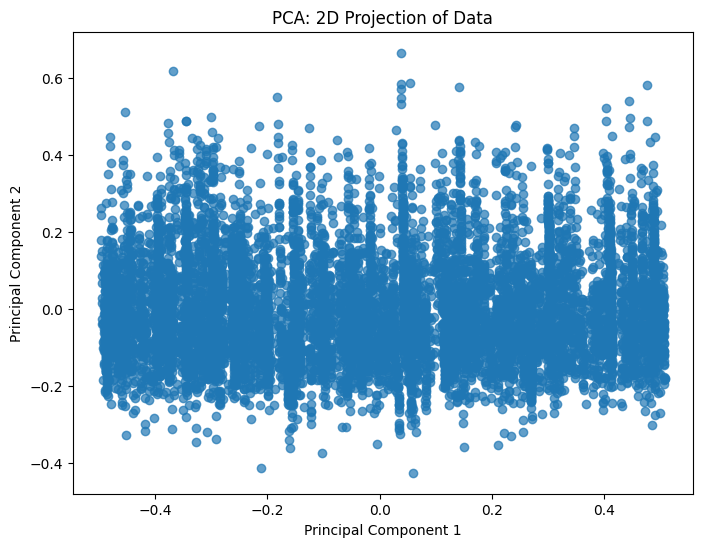

In [15]:
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative explained variance:", pca.explained_variance_ratio_.cumsum())

# plotting the 2 principal components
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: 2D Projection of Data')
plt.show()


## 2.3 Clustering
#### How can you determine the optimal number of clusters for your data? Please use at least two methods and provide their results.

We implemented the elbow and silhouette method 

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

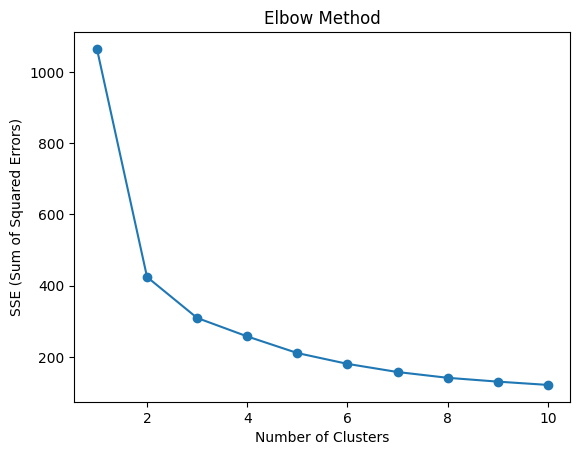

In [18]:
# Starting with the elbow method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# range of clusters to try
range_clusters = range(1, 11)
list_inertia = []

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    list_inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.plot(range_clusters, list_inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE (Sum of Squared Errors)')
plt.title('Elbow Method')
plt.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

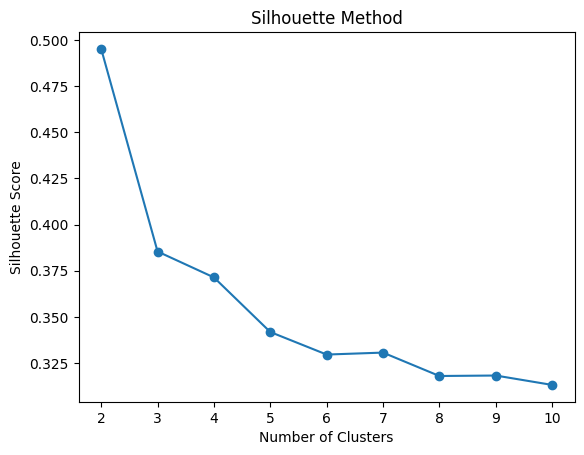

In [20]:
# Silhoutte method 
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):  # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(normalized_data)
    score = silhouette_score(normalized_data, labels)
    silhouette_scores.append(score)

# Plotting the Silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

the elbow method suggested 2 clusters while the silhoutte method 3

##### Implement the K-means clustering algorithm (not K-means++) through MapReduce. We request that you develop the algorithm from scratch based on what you've learned in class and run the algorithm on your data.

In [23]:
import numpy as np
from collections import defaultdict

def kmeans_mapreduce(D, k, max_iterations=100):
    D = np.array(D)
    # Initializing centroids randomly
    np.random.seed(42)
    centroids = D[np.random.choice(D.shape[0], k, replace=False)]
    
    for iteration in range(max_iterations):
        
        # ----- Map Phase -----
        # Assigning points to the closest centroid
        distances = np.linalg.norm(D[:, None] - centroids, axis=2)  # Shape: (n_samples, k)
        labels = np.argmin(distances, axis=1)  # Assign each point to a cluster
        
        # ----- Reduce Phase -----
        # Recalculating centroids by averaging the points in each cluster
        new_centroids = np.array([D[labels == i].mean(axis=0) if np.any(labels == i) else centroids[i]
                                   for i in range(k)])  # Avoid empty clusters
        
        # Check for convergence
        if np.allclose(centroids, new_centroids):
            print(f"Converged after {iteration + 1} iterations.")
            break
        
        centroids = new_centroids

    return centroids, labels

##### Implement the K-means++ algorithm from scratch and apply it to your data. Do you notice any differences between the results obtained using random initialization and those achieved with K-means++? Please explain your observations and discuss why these differences might occur.

In [24]:
import numpy as np

def kmeans_plus_plus(D, k, epsilon=1e-4, max_iterations=300):
    D = np.array(D)
    n_samples = D.shape[0]

    # Initializing centroids using K-means++
    centroids = []
    centroids.append(D[np.random.randint(n_samples)])  # Randomly choose the first centroid

    for _ in range(1, k):
        # Calculatin the squared distances from each point to the nearest centroid
        distances = np.min([np.linalg.norm(D - c, axis=1) for c in centroids], axis=0)
        
        # Choosing the new centroid 
        probs = distances / np.sum(distances)
        chosen_centroid = D[np.random.choice(range(n_samples), p=probs)]
        centroids.append(chosen_centroid)

    centroids = np.array(centroids)

    prev_centroids = np.zeros_like(centroids)
    labels = np.zeros(D.shape[0])

    # Iterating through K-means steps
    for t in range(max_iterations):
        # Assigning each point to the closest centroid
        for i in range(D.shape[0]):
            distances = np.linalg.norm(D[i] - centroids, axis=1)
            labels[i] = np.argmin(distances)

        # Update centroids 
        for j in range(k):
            points_in_cluster = D[labels == j]
            if len(points_in_cluster) > 0: # no 0 clusters
                centroids[j] = points_in_cluster.mean(axis=0)

        # Checking whether the centroids change, if they dont stop the iterations
        if np.linalg.norm(centroids - prev_centroids) <= epsilon:
            print(f"Converged after {t + 1} iterations.")
            break

        prev_centroids = centroids.copy()

    return centroids, labels


Observations: Differences Between Random Initialization and K-means++
When comparing the clustering results obtained using random initialization and K-means++ initialization, the following differences are typically observed:

Cluster Compactness (SSE):

K-means++: Results in tighter and more cohesive clusters, reflected in a lower Sum of Squared Errors (SSE).
Random Initialization: Often yields higher SSE due to suboptimal initial centroids, leading to poorly separated clusters.
Convergence Speed:

K-means++: Converges faster because the initial centroids are chosen to maximize distance between them, which reduces the likelihood of poor initial clustering.
Random Initialization: May take longer to converge, as the algorithm needs to compensate for poor initial centroid placement by iterating more times.
Cluster Quality (Silhouette Score):

K-means++: Tends to produce clusters with better-defined boundaries, resulting in higher silhouette scores.
Random Initialization: May create poorly defined clusters, resulting in lower silhouette scores.
Stability:

K-means++: Provides more consistent results across multiple runs, as the initialization reduces the randomness involved in centroid selection.
Random Initialization: Can lead to highly variable results depending on the random starting points.

### 2.3

Agglomerative Hierarchical Clustering algorithm is another good choise for clustering since it doesn't require you to specify the number of clusters in advance, it can find clusters with arbitrary shapes (especially when using complete linkage or average linkage). It's more flexible than K-means in this sense. Additionally the dendrogram helps you visualize how clusters are formed and decide on the optimal number of clusters based on the tree structure.


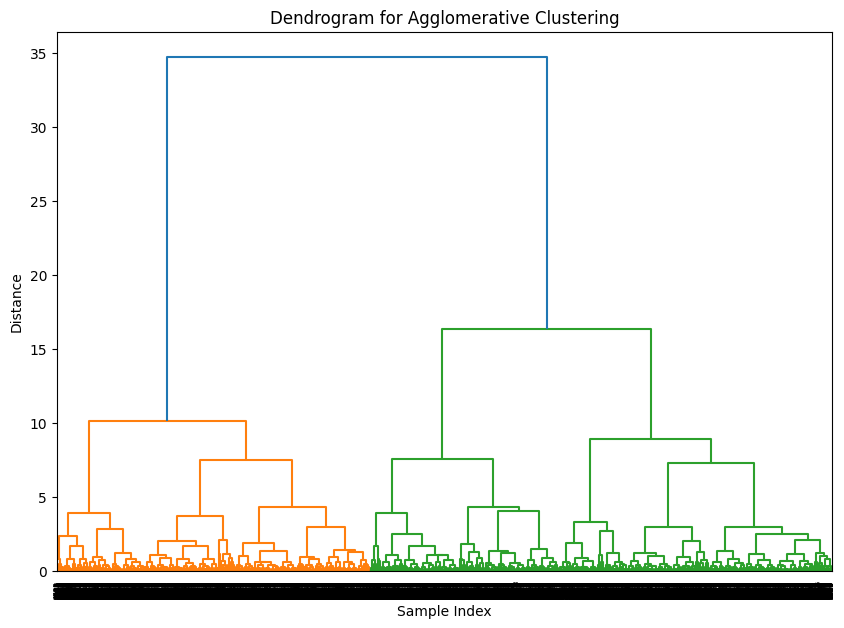

In [25]:
import scipy.cluster.hierarchy as sch

# linkage matrix
Z = sch.linkage(normalized_data, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(Z)
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


#### 2.4 Best Algorithm


##### 2.4.1 K-MEANS

In [26]:
# Set the number of clusters to the optimal number k based on any of the methods previously.
k = 4
centroids, labels = kmeans_mapreduce(normalized_data, k)

print(f"Final centroids: \n{centroids}")
print(f"Cluster labels: \n{labels}")

Converged after 25 iterations.
Final centroids: 
[[0.72828464 0.49991538 0.05527531]
 [0.45479663 0.69024988 0.01781333]
 [0.66644548 0.16468218 0.04625954]
 [0.70754011 0.85117718 0.05214383]]
Cluster labels: 
[3 2 0 ... 2 2 2]


##### 2.4.2 Select three distinct metrics to assess the quality of the clusters. Describe each metric in detail, including the specific aspects they evaluate to determine the effectiveness of the clustering model.
- Each metric evaluates different aspects of clustering:
    - Silhouette Score : The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters. balances cohesion and separation at the data-point level.
    - Inertia: Inertia focuses on intra-cluster cohesion, it measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster.
    - Davies-Bouldin Index: This index balances compactness and separation at the cluster level. The score is defined as the average similarity measure of each cluster with its most similar cluster, where similarity is the ratio of within-cluster distances to between-cluster distances.


##### 2.4.3 Apply the three clustering algorithms used in the prior section to partition the data into k clusters. Then, evaluate each model's clustering quality using the selected metrics. Summarize your findings by comparing the results of each algorithm based on the metric evaluations.


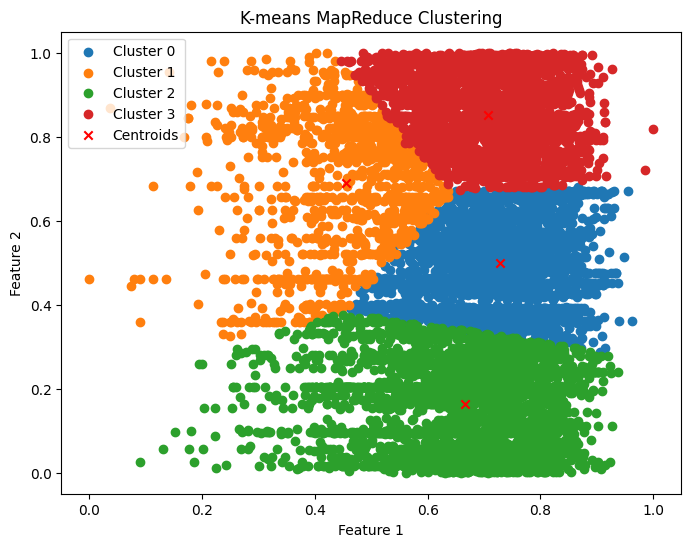

In [27]:
### K-MEANS

import matplotlib.pyplot as plt
# visualizing the result 
plt.figure(figsize=(8, 6))
labels = np.array(labels)
normalized_data = np.array(normalized_data)
# scatter plot of the data points 
for i in range(k):
    cluster_points = normalized_data[labels == i]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {i}")

# Plotting the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', label='Centroids')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means MapReduce Clustering')
plt.legend()
plt.show()


In [28]:
## K-MEANS ++ 
centroids1, labels1 = kmeans_plus_plus(normalized_data, k)

# Output the centroids and labels
print("Centroids:", centroids1)
print("Labels:", labels1)

Converged after 51 iterations.
Centroids: [[0.67189063 0.15373438 0.04790768]
 [0.68418964 0.47016223 0.04558677]
 [0.49140502 0.79178705 0.02055452]
 [0.74286309 0.82341728 0.06121763]]
Labels: [3. 0. 1. ... 0. 0. 0.]


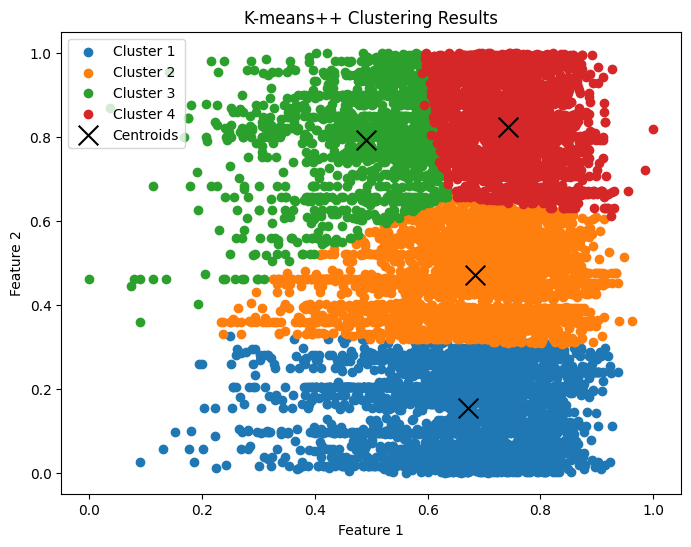

In [29]:
# Plotting the clusters
plt.figure(figsize=(8, 6))

for i in range(k):
    cluster_points = normalized_data[labels1 == i]
    
    # Plot these points
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i + 1}')

# Plot centroids
plt.scatter(centroids1[:, 0], centroids1[:, 1], marker='x', color='black', s=200, label='Centroids')

# Set plot labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means++ Clustering Results')

# Show the legend
plt.legend()

# Display the plot
plt.show()

From the visual analysis of the images, K-means++ seems to perform better than K-means in this particular case. The clusters in the K-means++ image are more distinct, with better separation and positioning of centroids. The K-means algorithm, while still producing reasonable clusters, appears to struggle with the initial random centroids, leading to less optimal results.

In [30]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
from sklearn.cluster import KMeans

# K-means Clustering
kmeans = KMeans(n_clusters=4, init='random', random_state=42)
kmeans_labels = kmeans.fit_predict(normalized_data)

# K-means++ Clustering
kmeans_plus_plus = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_plus_plus_labels = kmeans_plus_plus.fit_predict(normalized_data)

# Evaluate K-means
silhouette_kmeans = silhouette_score(normalized_data, kmeans_labels)
db_kmeans = davies_bouldin_score(normalized_data, kmeans_labels)
inertia_kmeans = kmeans.inertia_

# Evaluate K-means++
silhouette_kmeans_pp = silhouette_score(normalized_data, kmeans_plus_plus_labels)
db_kmeans_pp = davies_bouldin_score(normalized_data, kmeans_plus_plus_labels)
inertia_kmeans_pp = kmeans_plus_plus.inertia_

# Print the results
print("K-means Clustering Evaluation:")
print(f"Silhouette Score: {silhouette_kmeans}")
print(f"Davies-Bouldin Index: {db_kmeans}")
print(f"Inertia: {inertia_kmeans}")

print("\nK-means++ Clustering Evaluation:")
print(f"Silhouette Score: {silhouette_kmeans_pp}")
print(f"Davies-Bouldin Index: {db_kmeans_pp}")
print(f"Inertia: {inertia_kmeans_pp}")


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


K-means Clustering Evaluation:
Silhouette Score: 0.37729803384894717
Davies-Bouldin Index: 0.935629690059789
Inertia: 257.7770413421156

K-means++ Clustering Evaluation:
Silhouette Score: 0.3713900288342448
Davies-Bouldin Index: 0.9552008667826901
Inertia: 257.7874931719002


In [31]:
import numpy as np
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
import matplotlib.pyplot as plt

n_clusters = 4
hierarchical_labels = fcluster(Z, n_clusters, criterion='maxclust')

# Evaluate clustering quality
silhouette_hc = silhouette_score(normalized_data, hierarchical_labels)
davies_bouldin_hc = davies_bouldin_score(normalized_data, hierarchical_labels)

# Print the evaluation results
print("Hierarchical Clustering Evaluation:")
print(f"Silhouette Score: {silhouette_hc}")
print(f"Davies-Bouldin Index: {davies_bouldin_hc}")

Hierarchical Clustering Evaluation:
Silhouette Score: 0.3166700682870408
Davies-Bouldin Index: 1.0438568870646099


The K-means seems to be the best method overall in terms of both Silhouette Score and Davies-Bouldin Index, suggesting well-separated and compact clusters. While K-means++ performed very similarly to K-means but has slightly worse scores, indicating that its centroid initialization strategy did not significantly improve the results for this dataset.
In contrast the hierarchical clustering had the lowest performance, with lower Silhouette Score and higher Davies-Bouldin Index, likely due to its sensitivity to noise and outliers.

# *Bonus Question*


### Visualizing K-means Iterations

The following plots illustrate the iterative process of the K-means algorithm with random initialization over the first 10 iterations.  We used the first two principal components (PC1 and PC2) from a PCA transformation of the normalized movie data as our features for visualization. PCA was chosen because it optimally reduces dimensionality while retaining most of the variance in the data, leading to a clearer visual separation of clusters in the 2D projection.

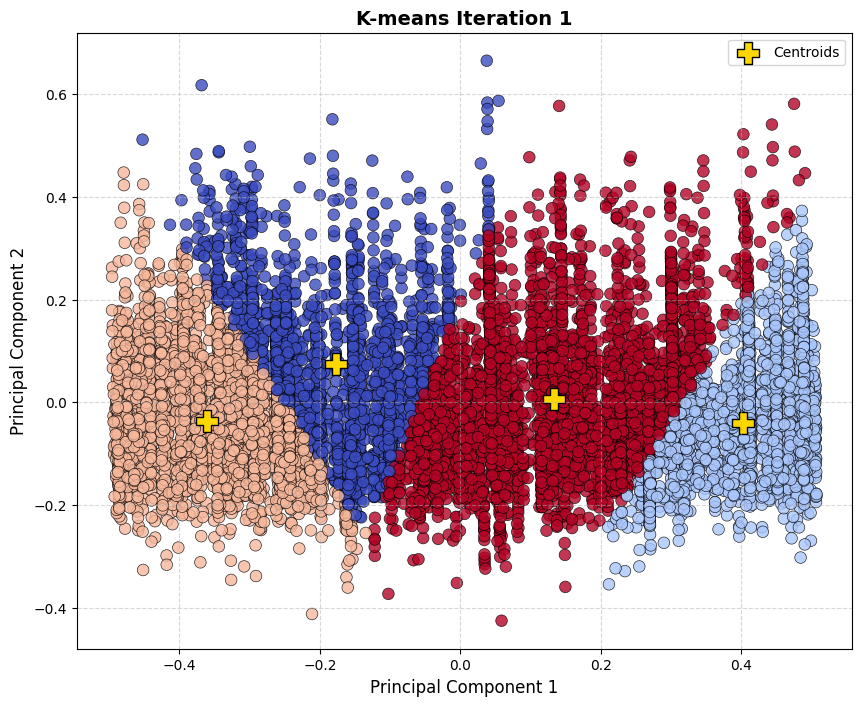

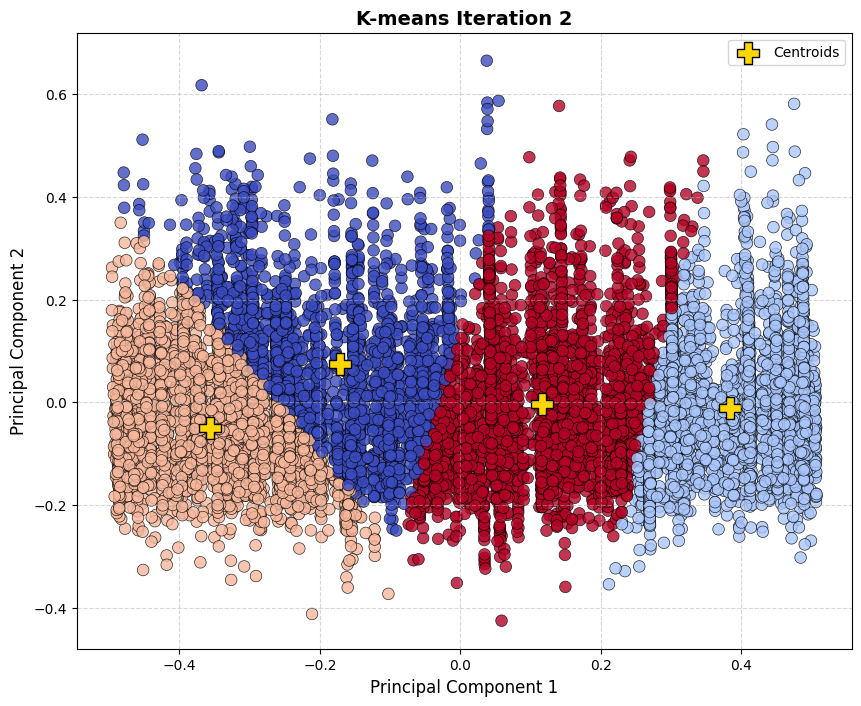

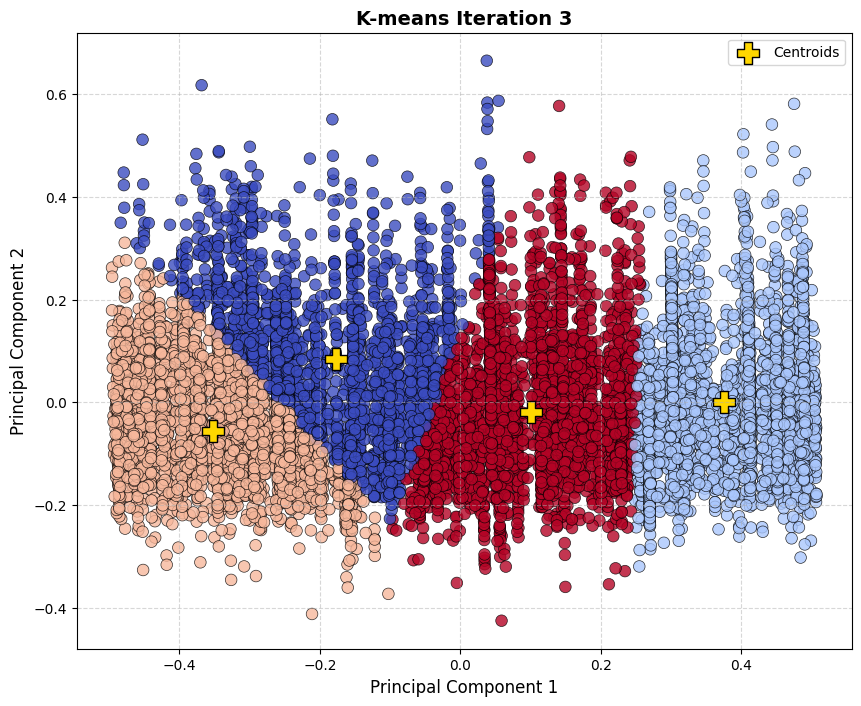

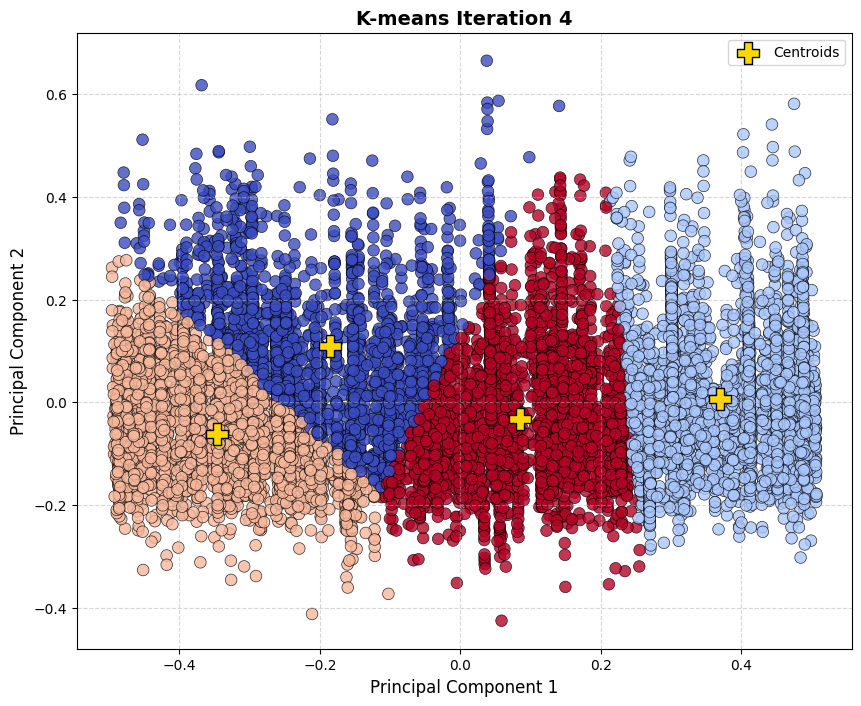

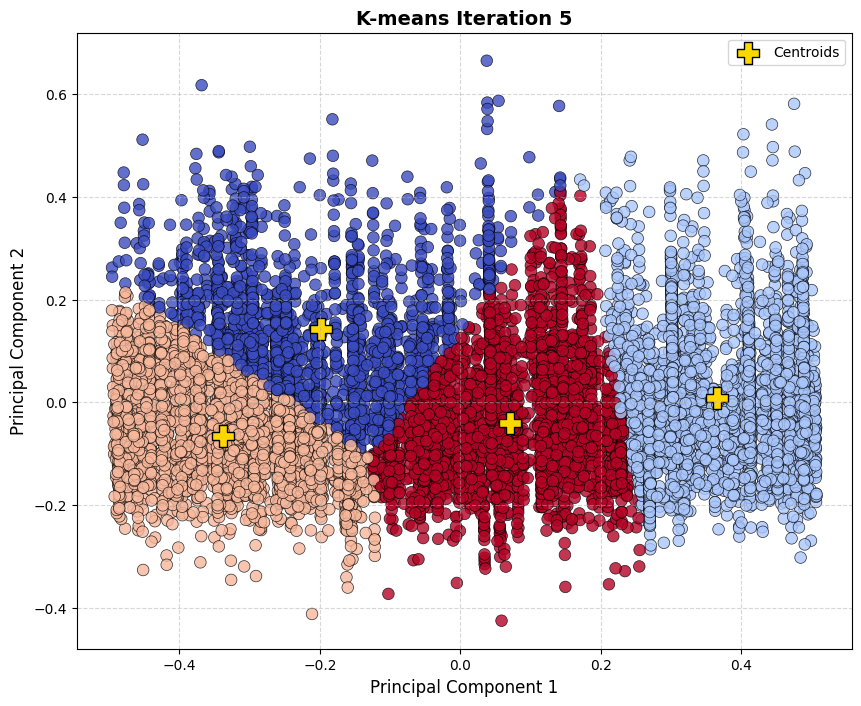

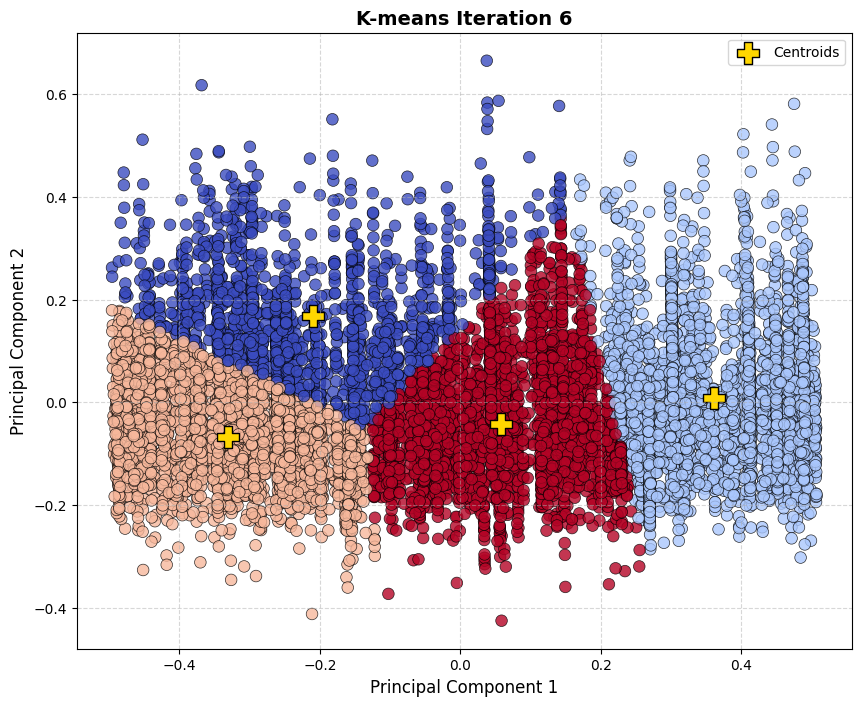

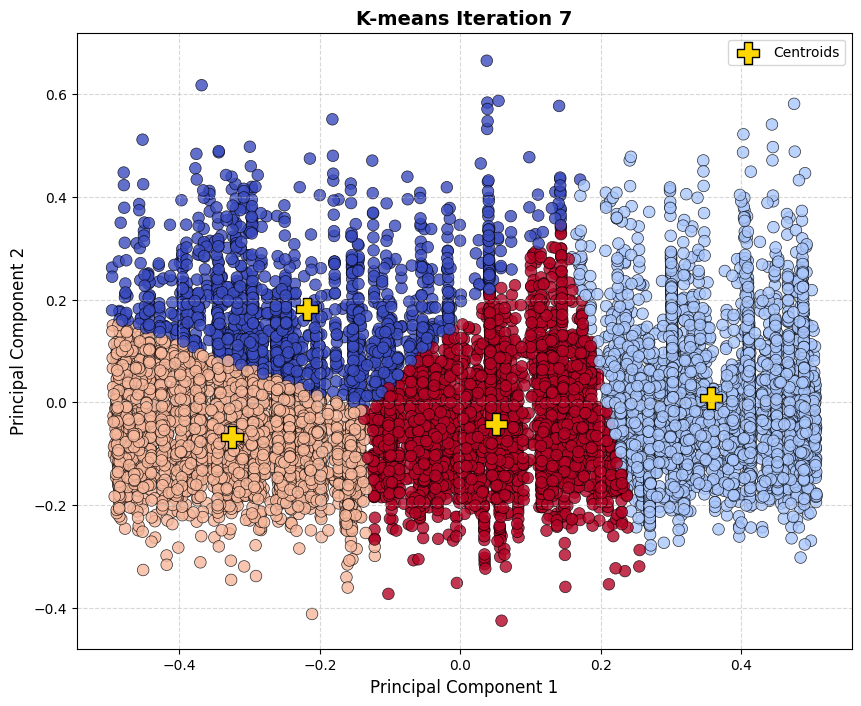

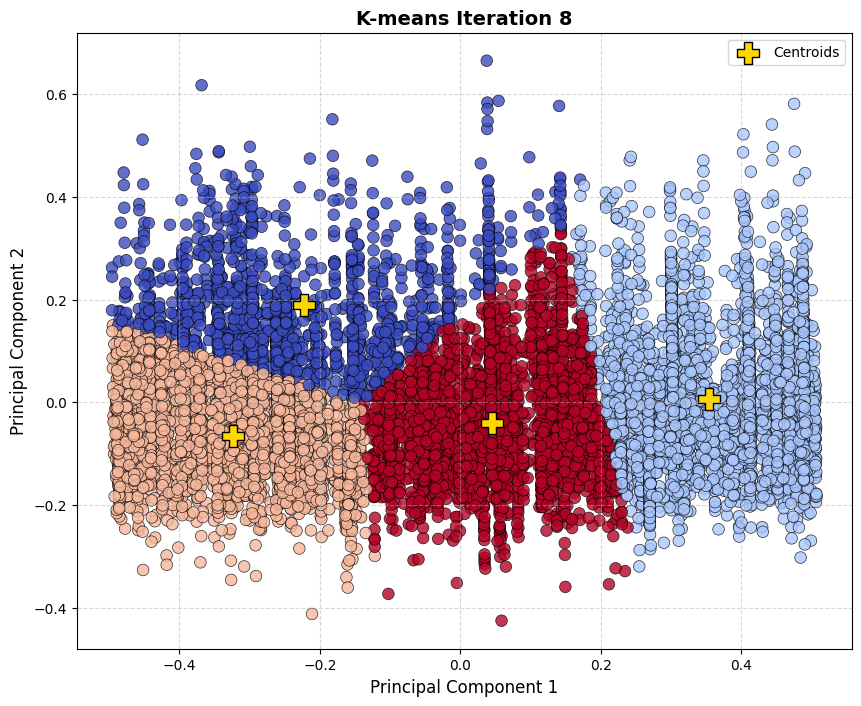

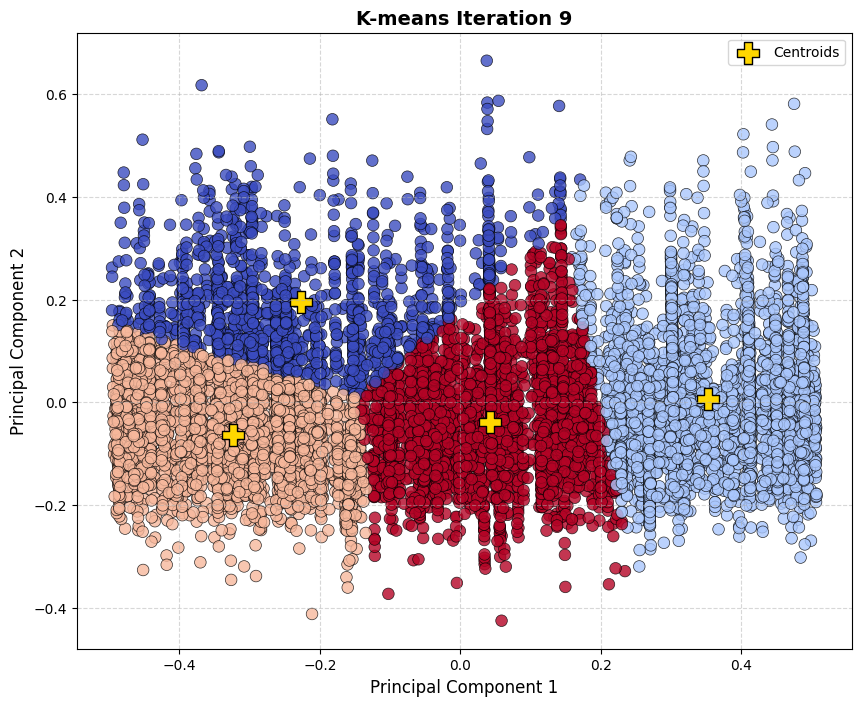

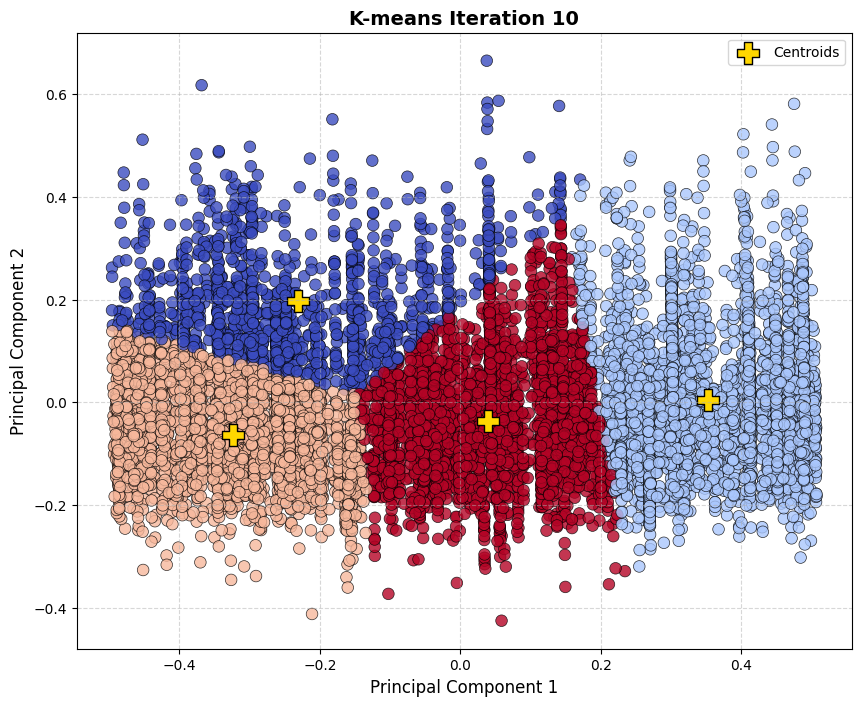

Final centroids: [[-0.23074778  0.1971978 ]
 [ 0.35213799  0.00540781]
 [-0.32370891 -0.06418323]
 [ 0.03917246 -0.03602368]]


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# Data preparation
numeric_cols = ['ratings_avg', 'relevant_genome_tag', 'tag_count']
data = df[numeric_cols].dropna()
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(data), columns=numeric_cols)

# PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(normalized_data)
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])


def euclidean_distance(point1, point2):
    """Calculates Euclidean distance between two points."""
    return np.sqrt(np.sum((point1 - point2)**2))


def kmeans(data, k, max_iterations=10, tolerance=1e-6):
    """K-means clustering algorithm with random initialization and iteration visualization."""
    
    #Randomly initialize centroids
    np.random.seed(43) # setting seed for reproducibility
    centroids = data.sample(n=k).values
    
    for iteration in range(max_iterations):
        # Assign points to nearest centroid
        labels = np.array([np.argmin([euclidean_distance(point, centroid) for centroid in centroids]) for point in data.values])

        # Update centroids
        new_centroids = np.array([data[labels == i].mean().values if len(data[labels == i]) > 0 else centroids[i] for i in range(k)])

        # Check for convergence
        if np.allclose(centroids, new_centroids, atol=tolerance):
            print(f"Convergence reached at iteration {iteration + 1}")
            break

        centroids = new_centroids.copy()
        
        plt.figure(figsize=(10, 8))
        plt.scatter(data['PC1'], data['PC2'], c=labels, cmap='coolwarm', alpha=0.8, s=70, edgecolors='k', linewidths=0.5)
        plt.scatter(centroids[:, 0], centroids[:, 1], marker='P', s=250, c='gold', label='Centroids', edgecolors='k', linewidths=1)
        plt.title(f'K-means Iteration {iteration + 1}', fontsize=14, fontweight='bold')
        plt.xlabel('Principal Component 1', fontsize=12)
        plt.ylabel('Principal Component 2', fontsize=12)
        plt.legend(loc='upper right', fontsize=10)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.show()

    return centroids, labels

k = 4
centroids, labels = kmeans(reduced_df, k)
print("Final centroids:", centroids)


**Observations:**

* **Iteration 1:** The initial centroids are randomly placed.  The resulting clusters are quite dispersed and poorly defined at this stage; some clusters are clearly ill-formed.

* **Iterations 2-4:**  We see a significant shift in centroid positions as the algorithm refines the cluster assignments.  Points are reassigned to the nearest centroid in each step, causing the centroids to move towards the center of their respective point clusters. The clusters become gradually more defined and compact.

* **Iterations 5-10:** The changes in centroid positions and cluster shapes become less dramatic as the algorithm approaches convergence. The clusters stabilize and points' assignments remain relatively unchanged. Note that convergence is not perfect in all clusters; some points remain in areas with ambiguous cluster assignments due to the limitations of K-Means when facing more complex cluster shapes.

**Overall:**

The visualization effectively demonstrates the iterative refinement process of K-means. The initial randomness of centroid placement leads to a gradual evolution of the clusters toward a more optimal configuration. We observe the centroids moving, and the clusters changing shape and becoming more defined and compact as the algorithm progresses. Note how the final clustering is more organized than the initialization. The lack of perfect spherical clusters is a limitation of K-Means.

# *Algorithmic Question*

#### **a) Pseudocode:**


**function aryaWins(nums)**<br>
Given a list of integers, we want to see if Arya vs her opponent (both playing optimally), has at least one chance to win the game

**Input:**
- nums: an array of integers

**Output:**
- a boolean value that will be True if Arya can win, False otherwise

**Algorithm:**

    n = len(nums)
    memo = matrix with shape [n][n] initialized to null to save intermediate results (We'll use memoization)
    
> **function maxScore(l, r)**<br>
> Given the first and the last index of a sequence, compute the max score Arya con get
>
> **Input:**
> - l: an integer, representing the far left index of the sequence
> - r: an integer, representing the far right index of the sequence
>       
> **Output:**
> - the max score Arya can get
>
> **Algorithm:**
>    
>       if the sequence is empty, return 0
>       if memo[l][r] != null so already computed, return it
>       
>       Arya (1st player) selects the first or the last number.
>       In both cases, we'll use min() to model the opponent's optimal way to play
>       (his goal is to make a choice that minimizes in each case after his choice, the maximum score Arya can get from the remaining sequence)
>       chooseLeft = nums[l] + min(maxScore(l+2, r), maxScore(l+1, r-1))  
>       // (l+2, r): indices of the remaining sequence after the opponent has chosen the first (left) number
>       // (l+1, r-1): indices of the remaining sequence after the opponent has chosen the last (right) number
>       chooseRight = nums[r] + min(maxScore(l+1, r-1), maxScore(l, r-2))
>       // same logic as above
>       
>       memo[l][r] = max(chooseLeft, chooseRight) 
>       return memo[l][r]
    
    total = sum(nums)
    aryaScore = maxScore(0, n-1)
    opponentScore = total-aryaScore
    return aryaScore >= opponentScore




#### **b) Python program:**

In [34]:
def aryaWins(nums):
    """Function that given a list of integers, show if Arya vs her opponent (both playing optimally), has at least one chance to win the game

    Args:
        nums (list): a list of integers

    Returns:
        aryaScore >= opponentScore (boolean): value that will be True if Arya can win, False otherwise
    """
    n = len(nums)

    # table to save intermediate results (I'll use memoization)
    memo = [[None] * n for _ in range(n)]

    def maxScore(l, r):
        """Recursive function to compute Arya's max possible score given the first and the last index of a sequence

        Args:
            l (int): left index, represent the first index of the array
            r (int): right index, represent the last index of the array

        Returns:
            int: the max score Arya can get
        """
        # base case: if l > r, the sequence is empty 
        if l>r:
            return 0
        # "memoization case": if has been already computed, use the stored result
        if memo[l][r] is not None:
            return memo[l][r]
        # recursive case: if memo[l][r] is None, Arya (1st player) choose the first or the last number of the sequence
        chooseLeft = nums[l] + min(maxScore(l+2, r), maxScore(l+1, r-1))
        chooseRight = nums[r] + min(maxScore(l+1, r-1), maxScore(l, r-2))
        memo[l][r] = max(chooseLeft, chooseRight)
        return memo[l][r]

    total = sum(nums)
    aryaScore = maxScore(0, n-1)
    opponentScore = total-aryaScore
    return aryaScore >= opponentScore # if her score is >= the score of her opponent, Arya wins


In [35]:
# test cases

test_cases = [
      ([1, 5, 2], False), 
      ([1, 5, 233, 7], True),
      ([20, 30, 2, 2, 2, 10, 50, 1], True),
      ([5, 3, 7, 10, 2, 9, 4, 6, 8], False)
]

for nums, expected in test_cases:
      result = aryaWins(nums)
      print(f"Arya wins: {result} \t(Expected: {expected})")

Arya wins: False 	(Expected: False)
Arya wins: True 	(Expected: True)
Arya wins: True 	(Expected: True)
Arya wins: False 	(Expected: False)


#### **c) Code's time complexity analysis:**

The algorithm uses dynamic programming with memoization to calculate the maximum score Arya can achieve.
Is efficient and operates in polynomial time:

**Memoization:**<br>
- The memoization table memo is used to store the results of subproblems to avoid redundant calculations.
- The table has dimensions n x n, where n is the length of the input list nums.

**Number of Subproblems:**<br>
- There are O(n^2) possible subproblems, as each subproblem is defined by a pair of indices (l, r) where (0 $\leq$ l $\leq$ r < n).

**Time per Subproblem:**<br>
- For each subproblem (l, r), the algorithm works in constant time.

**Asymptotic Time Complexity:**<br>
- The total number of subproblems is O(n^2).
- The time to solve each subproblem is O(1) due to memoization.
- So, the overall time complexity of the algorithm is O(n^2).

#### We skipped **d** and **e** points because the algorithm wasn't exponential 

#### **f) LLM evaluation:**

**Optimized version of the algorithm**

In [36]:
def aryaWins(nums):
    """Function that returns True if Arya can win given an array of integers, False otherwise.

    Args:
        nums (list): List of integers.

    Returns:
        bool: True if Arya wins, False otherwise.
    """
    n = len(nums)
    if n == 0:
        return False

    # dp[i][j] will store the maximum score Arya can get from nums[i] to nums[j]
    dp = [[0] * n for _ in range(n)]

    # Base case: when the subarray has only one element
    for i in range(n):
        dp[i][i] = nums[i]

    # Fill the table for subarrays of length 2 to n
    for length in range(2, n+1):
        for i in range(n-length+1):
            j = i+length-1
            # Arya chooses the left or right end and the opponent plays optimally
            chooseLeft = nums[i] + min(dp[i+2][j] if i+2 <= j else 0, dp[i + 1][j-1] if i+1 <= j-1 else 0)
            chooseRight = nums[j] + min(dp[i+1][j-1] if i+1 <= j-1 else 0, dp[i][j-2] if i <= j-2 else 0)
            dp[i][j] = max(chooseLeft, chooseRight)

    aryaScore = dp[0][n-1]
    total = sum(nums)
    opponentScore = total-aryaScore

    return aryaScore >= opponentScore



In [37]:
# same test cases as above

test_cases = [
      ([1, 5, 2], False), 
      ([1, 5, 233, 7], True),
      ([20, 30, 2, 2, 2, 10, 50, 1], True),
      ([5, 3, 7, 10, 2, 9, 4, 6, 8], False)
]

for nums, expected in test_cases:
      result = aryaWins(nums)
      print(f"Arya wins: {result} \t(Expected: {expected})")

Arya wins: False 	(Expected: False)
Arya wins: True 	(Expected: True)
Arya wins: True 	(Expected: True)
Arya wins: False 	(Expected: False)


**Complexity analysis of the optimized version of the algorithm**

**Dynamic Programming Table:**<br>
- The dp table is used to store the maximum score Arya can get from nums[i] to nums[j] and the table has dimensions n x n.

**Base Case:**<br>
- When the subarray has only one element, dp[i][i] = nums[i].

**Filling the Table:**<br>
- The table is filled for subarrays of length 2 to n.
- For each subarray (i, j), the algorithm computes chooseLeft and chooseRight and stores the maximum in dp[i][j].

**Number of Subproblems:**<br>
- There are O(n^2) possible subproblems, as each subproblem is defined by a pair of indices (i, j) where (0 $\leq$ i $\leq$ j < n).

**Time per Subproblem:**<br>
- For each subproblem (l, r), the algorithm works in constant time.

So, the overall time complexity is O(n^2)

Both solutions have the same overall time complexity of O(n^2) but the second solution (dynamic programming) is generally more straightforward and easier to understand because it avoids the overhead of recursive function calls and directly fills the dp table iteratively. This can also lead to better performance in practice due to reduced function call overhead.